# Uvod u Pymote

Cilj ove vježbe je napraviti pregled najbitnijih komponenti paketa Pymote namjenjenog simulaciji raspodijeljenih algoritama.

Za to se koristi interaktivna konzola IPython *obavezno* pokrenuta s profilom `pymote` na slijedeći način `ipython --profile=pymote` ili pokretanjem programa `ipymote` kojim se čini ista stvar. Na taj način, između ostalog, napravljen je import najvažnijih klasa i funkcija paketa Pymote te je podešen *backend* Qt za `matplotlib` paket i grafičko sučelje.

Alternativno moguće je koristiti i ovaj notebook pokretanjem jupyter-a sa `ipython notebook --profile=pymote`.

**Napomena:** promjene u instalaciji simulatora

    pip install matplotlib==2.2.3
    pip install notebook

## Ispitivanje terena

Na početku možemo ispitati što se nudi u paketu i kako to odgovara teoriji obrađenoj u predavanju "Raspodijeljena računalna okruženja".

**Napomena:** programski kod u ovom dijelu vježbe primarno služi kao ilustracija osnovnih klasa koje sačinjavaju raspodijeljeno računalno okruženje te njihovih metoda i atributa i nije niti predviđeni niti preporučeni način korištenja simulatora.

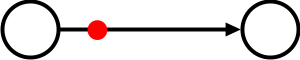

In [106]:
from IPython.display import Image
Image('images/entiteti_poruka.png')

Osnovni elementi računalnog okruženja su **entiteti** i **poruke**, a dodatna struktura koja je uvedena kroz simulator i u kojoj su grupirani entiteti je **mreža**.

In [107]:
import sys
sys.path

['C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\src\\pymote39\\pymote\\scripts',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\python39.zip',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\DLLs',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64',
 '',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages\\win32',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-pack

In [108]:
sys.path.append('C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\src\\pymote39')
sys.path.append('C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\Lib\\site-packages')

In [109]:
print(sys.version)


3.9.10 (tags/v3.9.10:f2f3f53, Jan 17 2022, 15:14:21) [MSC v.1929 64 bit (AMD64)]


### Entiteti

Entiteti se u simulatoru nazivaju **čvorovi** i predstavljeni su instancama klase `Node`.

In [110]:
# wildcard import se inače ne preporuča koristiti no kako je cilj upoznati sve komponente paketa u ovom kontekstu je to u redu
from pymote import *

node = Node()

Memorija $M_x$ čvora $x$ je implementirana kroz atribut `memory`, a koji je običan python `dict` te omogućava osnovnu predviđenu funkcionalnost: spremanje proizvoljnih informacija odnosno podataka u pojedine registre odnosno ključeve.

In [111]:
node.memory

{}

Jedan od posebnih registara je u simulatoru izdvojen iz memorije, a to je statusni registar $\text{status}(x) \in \mathcal{S}$ i to je prema tipu podataka običan `string`.

In [112]:
node.status = ""

Čvoru je prilikom instanciranja dodjeljen jedinstveni identifikacijski broj ili `id`:

In [113]:
node.id

329

Čvor ima posebne atribute `inbox` i `outbox` koji se koriste za primitak i slanje poruka, trenutno su prazni.

In [114]:
print(node.inbox)
print(node.outbox)

[]
[]


U pythonu, instance i njihovi atributi i metode se mogu dohvatiti funkcijom `dir` (introspekcija). Više informacija se može pronaći u dokumentaciji paketa, a ponekad i sam izvorni kôd jasno otkriva svrhu pojedine metode. 

In [115]:
#node.reset??

Čvor trenutno nije dio nijedne mreže. Indikacija toga je što atribut `network` nije postavljen:

In [116]:
node.network is None

True

### Mreža

Stvorimo praznu mrežu te možemo dodati ranije stvoreni čvor u nju.

In [117]:
net = Network()

Environment2D


In [118]:
from networkx import Graph

In [119]:
#Graph.add_node()
#print(Graph.nodes(data=False))

In [120]:
net.add_node(node)

Node 329 is placed on position [554.51903267 540.28611681].


<Node id=329>

Sada čvor ima postavljen atribut `network`:

In [121]:
node.network

Veza je dvosmjerna, odnosno i mreža 'zna' koji čvorovi su dio mreže:

In [122]:
net.nodes()

NodeView((<Node id=329>,))

Ako ne specificiramo čvor koji se dodaje, metoda sama stvara novi.

In [123]:
net.add_node()

Node 330 is placed on position [515.127929   315.05364486].


<Node id=330>

In [124]:
net.nodes()

NodeView((<Node id=329>, <Node id=330>))

U metodi `add_node` može se specificirati i pozicija čvora no ako ona nije specificirana dodijeljuju se nasumično odabrane pozicije (lokacija i orijentacija). Trenutno dodjeljene lokacije mogu se pronaći u atributu `pos`, a orijentacije u atributu `ori`:

In [125]:
net.pos

{<Node id=329>: array([554.51903267, 540.28611681]),
 <Node id=330>: array([515.127929  , 315.05364486])}

In [126]:
net.ori

{<Node id=329>: 0.4071906266594974, <Node id=330>: 4.736354466079673}

Pozicije se biraju unutar *default*nog okruženja mreže odnosno 2D prostora veličine 600x600 koji je specificiran atributom `environment`.

In [127]:
net.environment

U slučaju 2D environmenta to je numpy 2d polje U kojem je sa 255 predstavljen prazan prostor, a sa vrijednostima manjim od 255 prepreke.

In [128]:
net.environment.im

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [129]:
net.environment.im.shape

(600, 600)

In [130]:
# podrska za iscrtavanje izravno u notebooku
%matplotlib inline

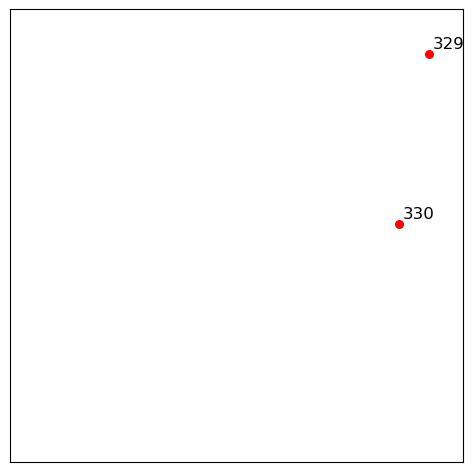

In [131]:
net.show()

Ukoliko čvorovi nisu povezani to je zbog ograničenog komunikacijskog dometa svakog od njih.

In [132]:
node.commRange

100

In [133]:
for node in net.nodes():
    node.commRange = 600
net.recalculate_edges()

Sa povećanim dometom trebali bi dobiti brid u grafu odnosno mogućnost komunikacije.

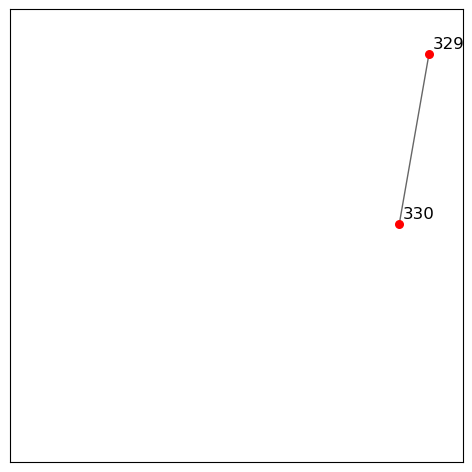

In [134]:
net.show()

### Poruke

Poruke u raspodijeljenom računalnom okruženju su po definiciji nizovi bitova koji su u simulatoru predstavljeni kao intance klase `Message`.

In [135]:
from pymote.message import Message
message = Message()

In [136]:
message


------ Message ------ 
     source = None 
destination = Broadcasted 
     header = '' 
id(message) = 0x1f44195bd90>

Za slanje poruke koristi se metoda `send`:

In [137]:
node.send(message)

Metoda `send` je poruku prebacila u outbox listu čvora.

In [138]:
node.outbox

[
 ------ Message ------ 
      source = <Node id=330> 
 destination = Broadcasted 
      header = '' 
 id(message) = 0x1f441b01970>]

Primijetite kako su podaci zapisani u poruku samim izvršenjem metode `send` osvježeni. Preciznije u ovom slučaju polje `source` je poprimilo odgovarajuću vrijednost.

In [139]:
net.communicate()

Sam čin komunikacije odnosno prebacivanja svih poruka iz polaznih u odredišne čvorove (susjede) je pod kontrolom mreže i obavlja se njenom metodom `communicate`. Ovaj dio se obično odvija automatizmom u svakom koraku simulacije, no o tome više u daljnjem tekstu.

Mreža, u ovisnosti o ograničenjima, može poruku ili zadržati određeni broj koraka ili isporučiti odmah u slijedećem koraku što je i *default* ponašanje.

Poruka više nije u `outbox`-u polazišnog čvora:

In [140]:
node.outbox

[]

Nalazi se u `inbox`-u odredišnog čvora ili čvorova:

In [141]:
other_node = net.nodes_list()[0]

In [142]:
other_node.inbox

[
 ------ Message ------ 
      source = <Node id=330> 
 destination = <Node id=329> 
      header = '' 
 id(message) = 0x1f441afbbb0>]

## 'Hello distributed world'

U ovom primjeru analiziramo implementaciju jednog od najjednostavnijih algoritama pod imenom `Flood`, a koji riješava problem *Broadcast*. Cilj algoritma je podijeliti informaciju koju posjeduje jedan čvor ostalim čvorovima u mreži.

### Kreiranje mreže

Mreža kao osnovna struktura može se kreirati na više načina. U većini slučajeva sasvim dovoljno je koristiti klasu `NetworkGenerator` kojoj se prilikom instanciranja pridruže željeni parametri kao što su broj čvorova (točan, maksimalan, minimalan) prosječan broj susjeda itd... 

U ovom primjeru jedini parametar koji se želi imati pod kontrolom je broj čvorova, a iznosi 100:

In [143]:
net_gen = NetworkGenerator(100)

Za detaljan opis opcija pogledati pymote dokumentaciju za klasu [NetworkGenerator](https://pymote.readthedocs.org/en/latest/reference/networkgenerator.html).

Nakon toga možemo koristiti metode generatora kako bi izradili nove mreže s željenim parametrima, primjerice za nasumičan raspored čvorova koristi se metoda `generate_random_network()`:

In [144]:
net = net_gen.generate_random_network()

Environment2D
Node 331 is placed on position [512.11380978 516.01509063].
Node 332 is placed on position [179.91724054 404.57112344].
Node 333 is placed on position [135.97348457 225.59177062].
Node 334 is placed on position [458.26330754 117.29149998].
Node 335 is placed on position [425.95399467 409.31854686].
Node 336 is placed on position [ 30.98796665 373.01376871].
Node 337 is placed on position [ 72.06399663 248.73612929].
Node 338 is placed on position [122.53837456 262.32572055].
Node 339 is placed on position [444.21052813 356.62303354].
Node 340 is placed on position [410.79345909 249.5708845 ].
Node 341 is placed on position [ 95.70596282 542.796224  ].
Node 342 is placed on position [435.98537944 564.60535684].
Node 343 is placed on position [584.01125243 569.92342095].
Node 344 is placed on position [525.99624183  35.21712557].
Node 345 is placed on position [270.52941378 421.42110827].
Node 346 is placed on position [421.35622413  45.37752193].
Node 347 is placed on posi

Metoda kao rezultat vraća željenu mrežu odnosno instancu klase `Network`:

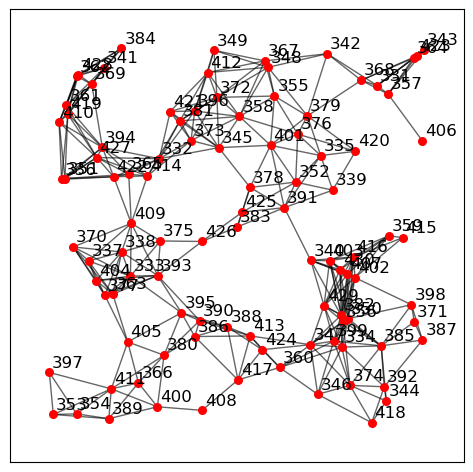

In [145]:
net.show()

### Algoritam

Algoritam `Flood` dio je modula `broadcast` te ukoliko ga želimo koristiti moramo ga uvesti:

In [146]:
from pymote.algorithms.broadcast import Flood

i pridružiti mreži:

In [147]:
net.algorithms = ( (Flood, {'informationKey': 'I'}), )

Kod pridruživanja algoritama mreži potrebno je primjetiti nekoliko stvari:

* pojedini algoritam je torka odn. `tuple` od dva elementa u kojem je prvi klasa algoritma, u ovom slučaju `Flood`, a drugi je `dict` koji se sastoji od parametara
    * npr. `Flood` prima kao obavezni parametar ključ pod kojim će čvorovi u svojoj memoriji spremati informaciju koja se želi podijeliti
* algoritmi se pridružuju kao elementi torke, a kako u ovom primjeru se pridružuje samo jedan algoritam potrebno je iza njega dodati zarez kako bi Python stvorio torku od jednog elementa
    * primjerice `(1)` je `int`, ali `(1, )` je `tuple`

Algoritam zahtijeva postojanje barem jednog čvora koji ima informaciju, odn. inicijatora. Kako bi to bilo osigurano jednom od čvorova se ta informacija treba upisati u memoriju prije pokretanja samog algoritma:

In [148]:
some_node = net.nodes_list()[0]                         # uzimamo prvi čvor u listi čvorova mreže
some_node.memory['I'] = 'Hello distributed world'  # pod ključem 'I' upisujemo informaciju

### Simulacija

Nakon definicije mreže i pridruživanja algoritma potrebno je pokrenuti simulaciju. Simulaciji se pri instanciranju kao argument šalje mreža nad kojom se želi obaviti simulacija:

In [149]:
sim = Simulation(net)

DEBUG   [simulation.py]: Simulation 0x1f4419cb140 created successfully.


Ostaje još samo i pokrenuti simulaciju:

In [150]:
sim.run()

DEBUG   [simulation.py]: [Flood] Step 1 finished
DEBUG   [simulation.py]: [Flood] Step 2 finished
DEBUG   [simulation.py]: [Flood] Step 3 finished
DEBUG   [simulation.py]: [Flood] Step 4 finished
DEBUG   [simulation.py]: [Flood] Step 5 finished
DEBUG   [simulation.py]: [Flood] Step 6 finished
DEBUG   [simulation.py]: [Flood] Step 7 finished
DEBUG   [simulation.py]: [Flood] Step 8 finished
DEBUG   [simulation.py]: [Flood] Step 9 finished
DEBUG   [simulation.py]: [Flood] Step 10 finished
DEBUG   [simulation.py]: [Flood] Step 11 finished
DEBUG   [simulation.py]: [Flood] Step 12 finished
DEBUG   [simulation.py]: [Flood] Step 13 finished
DEBUG   [simulation.py]: [Flood] Step 14 finished
DEBUG   [simulation.py]: [Flood] Step 15 finished
DEBUG   [simulation.py]: [Flood] Step 16 finished
DEBUG   [simulation.py]: [Flood] Step 17 finished
DEBUG   [simulation.py]: [Flood] Step 18 finished
DEBUG   [simulation.py]: [Flood] Step 19 finished
DEBUG   [simulation.py]: [Flood] Step 20 finished
DEBUG   [

Nakon što je završilo izvršavanje algoritama pogledajmo ako je informacija uspješno podijeljena tako što ćemo ispisati sadržaj memorije čvorova:

In [151]:
for node in net.nodes_list():
    print(node.id, node.memory['I'])

331 Hello distributed world
332 Hello distributed world
333 Hello distributed world
334 Hello distributed world
335 Hello distributed world
336 Hello distributed world
337 Hello distributed world
338 Hello distributed world
339 Hello distributed world
340 Hello distributed world
341 Hello distributed world
342 Hello distributed world
343 Hello distributed world
344 Hello distributed world
345 Hello distributed world
346 Hello distributed world
347 Hello distributed world
348 Hello distributed world
349 Hello distributed world
350 Hello distributed world
351 Hello distributed world
352 Hello distributed world
353 Hello distributed world
354 Hello distributed world
355 Hello distributed world
356 Hello distributed world
357 Hello distributed world
358 Hello distributed world
359 Hello distributed world
360 Hello distributed world
361 Hello distributed world
362 Hello distributed world
363 Hello distributed world
364 Hello distributed world
365 Hello distributed world
366 Hello distribute

Kako bi tijekom izvršavanja simulacije informacija o stanju u kojem se nalazi mreža bila potpuna prati se i trenutno stanje algoritma:

In [152]:
net.algorithmState

{'index': 0, 'step': 29, 'finished': True}

U ovom slučaju algoritam pod indeksom 0 odnosno `Flood` je završio (`'finished': True`), uz navedeni trenutni broj koraka `step`.

Ako se želi ponovno pokrenuti simulacija potrebno ju je resetirati:

In [153]:
sim.reset()

INFO    [simulation.py]: Resetting simulation.


čime se:

* stanje algoritama mreže postavlja na početno:

In [154]:
net.algorithmState

{'index': 0, 'step': 1, 'finished': False}

* te se uz to briše i sva memorija čvorova:

In [155]:
for node in net.nodes_list():
    print(node.memory)

{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}
{}


In [156]:
some_node.memory['I'] = 'Hello again'
sim.run()

DEBUG   [simulation.py]: [Flood] Step 1 finished
DEBUG   [simulation.py]: [Flood] Step 2 finished
DEBUG   [simulation.py]: [Flood] Step 3 finished
DEBUG   [simulation.py]: [Flood] Step 4 finished
DEBUG   [simulation.py]: [Flood] Step 5 finished
DEBUG   [simulation.py]: [Flood] Step 6 finished
DEBUG   [simulation.py]: [Flood] Step 7 finished
DEBUG   [simulation.py]: [Flood] Step 8 finished
DEBUG   [simulation.py]: [Flood] Step 9 finished
DEBUG   [simulation.py]: [Flood] Step 10 finished
DEBUG   [simulation.py]: [Flood] Step 11 finished
DEBUG   [simulation.py]: [Flood] Step 12 finished
DEBUG   [simulation.py]: [Flood] Step 13 finished
DEBUG   [simulation.py]: [Flood] Step 14 finished
DEBUG   [simulation.py]: [Flood] Step 15 finished
DEBUG   [simulation.py]: [Flood] Step 16 finished
DEBUG   [simulation.py]: [Flood] Step 17 finished
DEBUG   [simulation.py]: [Flood] Step 18 finished
DEBUG   [simulation.py]: [Flood] Step 19 finished
DEBUG   [simulation.py]: [Flood] Step 20 finished
DEBUG   [

## Analiza algoritma

Algoritam *Flood* je vrlo jednostavan i u cijelosti je definiran na slijedeći način:

$initiator \times \iota \longrightarrow \text{Process}(I);\; {\bf\text{send}}(I) \to N(x);\; {\bf\text{become}}\; \text{done}$

$idle \times \text{Receiving}(I) \longrightarrow \text{Process}(I);\; {\bf\text{send}}(I) \to N(x) - {\bf\text{sender}};\; {\bf\text{become}}\; \text{done}$

Pogledajmo kod za modul `pymote.algorithms.broadcast` u kojem se nalazi algoritam `Flood`:

In [157]:
from pymote.algorithm import NodeAlgorithm
from pymote.message import Message



class Flood(NodeAlgorithm):
    required_params = ('informationKey', )
    default_params = {'neighborsKey': 'Neighbors'}

    def initializer(self):
        ini_nodes = []
        for node in self.network.nodes_list():
            node.memory[self.neighborsKey] = node.compositeSensor.read()['Neighbors']
            node.status = 'IDLE'
            
            if node.memory.has_key(self.informationKey):
                node.status = 'INITIATOR'
                ini_nodes.append(node)
                
        for ini_node in ini_nodes:
            self.network.outbox.insert(0, Message(
                header=NodeAlgorithm.INI,
                destination=ini_node
            ))

    def initiator(self, node, message):
        if message.header == NodeAlgorithm.INI:
            node.send(Message(
                header='Information',  # default destination: send to every neighbor
                data=node.memory[self.informationKey]
            ))
            node.status = 'DONE'

    def idle(self, node, message):
        if message.header == 'Information':
            node.memory[self.informationKey] = message.data
            destination_nodes = list(node.memory[self.neighborsKey])
            destination_nodes.remove(message.source)  # send to every neighbor-sender
            
            if destination_nodes:
                node.send(Message(
                    destination=destination_nodes,
                    header='Information',
                    data=message.data
                ))
                
        node.status = 'DONE'

    def done(self, node, message):
        pass

    STATUS = {
        'INITIATOR': initiator,
        'IDLE': idle,
        'DONE': done,
    }

## Osnovne komponente

U ovom dijelu opisane su osnovne komponente Pymote paketa te njihov međusoban odnos.

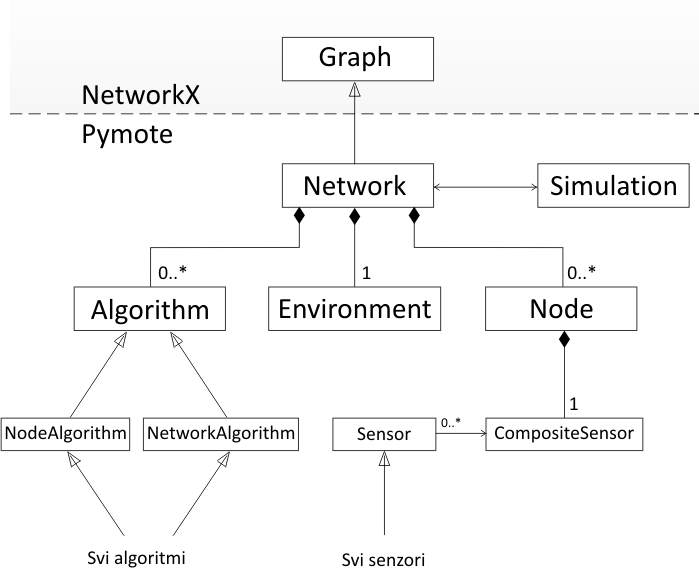

In [158]:
from IPython.display import Image
Image(filename='images/pymote_class_diagram.png')

### Graf

Pymote paket se zasniva djelomično na proširenju mogućnosti paketa [NetworkX](http://networkx.lanl.gov/index.html). Dodirna točka je klasa [Graph](http://networkx.github.io/documentation/latest/reference/classes.html) koja predstavlja neusmjereni graf.

In [159]:
from networkx import Graph
g = Graph()

`Graph` definira:

* vrhove grafa `Graph.node` -`dict` u kojem su ključevi vrhovi odnosno bilo kakvi *immutable/hashable* python objekti, a vrijednosti njihovi (opcionalni) atributi

In [160]:
g.add_nodes_from([1, 2, 3, 4, 5, 6])
g.nodes()

NodeView((1, 2, 3, 4, 5, 6))

* bridove grafa `Graph.adj` ili `Graph.edge` (isti objekt) - `dict` u kojem su ključevi vrhovi, a vrijednost za pojedini vrh je `dict` čiji su ključevi vrhovi susjedi zadanog vrha, a vrijednosti su (opcionalni) atributi brida

In [161]:
g.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (1, 6), (5, 2)])
print(g.edges() is g.adj)
g.edges()

False


EdgeView([(1, 2), (1, 3), (1, 6), (2, 3), (2, 5), (3, 4), (4, 5), (5, 6)])

* razne metode za manipulaciju strukturom grafa

In [162]:
import networkx
networkx.add_star(g, g.nodes())  # povezuje prvi cvor sa svim ostalima
g.edges

EdgeView([(1, 2), (1, 3), (1, 6), (1, 4), (1, 5), (2, 3), (2, 5), (3, 4), (4, 5), (5, 6)])

* [funkcije za iscrtavanje](http://networkx.github.io/documentation/latest/reference/drawing.html)

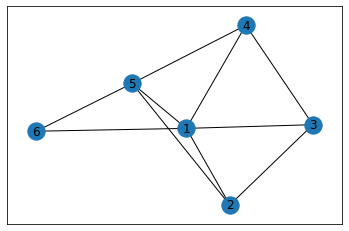

In [163]:
from networkx import draw_networkx
draw_networkx(g)

* [algoritme](http://networkx.github.io/documentation/latest/reference/algorithms.html), kao npr. [shortest_path](http://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html)

In [164]:
from networkx.algorithms import shortest_path
shortest_path(g, 2, 6)

[2, 5, 6]

Dodatno NetworkX paket sadrži i:

* druge tipove grafova (usmjereni, multigraf...) 

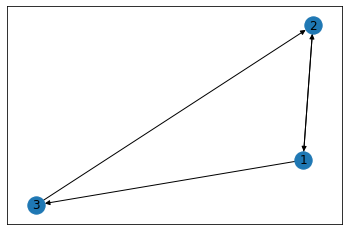

In [165]:
from networkx import DiGraph
dg = DiGraph([(1,2),(2,1),(1,3),(3,2)])
draw_networkx(dg)

* [generatore grafova](http://networkx.github.io/documentation/latest/reference/generators.html), kao npr. [hypercube_graph](http://networkx.github.io/documentation/latest/reference/generated/networkx.generators.classic.hypercube_graph.html#networkx.generators.classic.hypercube_graph)

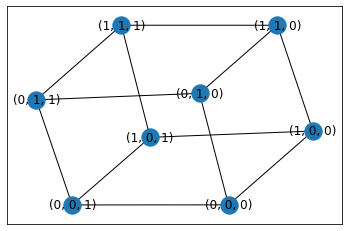

In [166]:
from networkx import hypercube_graph
hcg = hypercube_graph(3)
draw_networkx(hcg)

 * [konvertere](http://networkx.github.io/documentation/latest/reference/convert.html) itd.

[[ True  True  True  True False False]
 [ True  True  True False False False]
 [False  True False  True  True False]
 [ True False  True  True False False]
 [False False  True  True False  True]
 [ True  True False  True  True  True]]


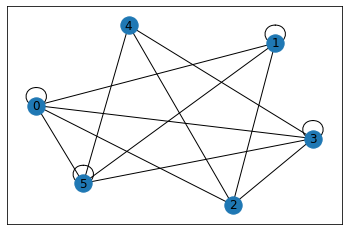

In [167]:
import numpy
mat = numpy.random.random((6, 6)) > 0.5
print(mat)
from networkx.convert_matrix import from_numpy_matrix
g = from_numpy_matrix(mat)
draw_networkx(g)

### Mreža

`Network` je osnovna klasa Pymote simulatora. Njene instance sadrže sve informacije potrebne kako bi se za pojedinu mrežu pokrenula ili nastavila simulacija njoj pripadajućih algoritama. Kao što je već naglašeno klasa `Network` je podklasa (podrazred) klase Graph iz paketa NetworkX. 

Uz sve postojeće značajke networkx grafa, Pymote u klasi `Network` proširuje mogućnosti sa slijedećim atributima i funkcionalnostima:

* `Network.environment` - trenutno je omogućeno samo 2D okruženje, kroz instancu klase `Environment2D`

Node 431 is placed on position [563.08500496 370.54333818].
Node 432 is placed on position [436.49384165 166.31098937].
Node 433 is placed on position [392.26479843 536.26917494].
Node 434 is placed on position [144.83951075 288.4622346 ].
Node 435 is placed on position [430.78069229 289.26840926].
Node 436 is placed on position [ 22.43213376 577.79747054].
Node 437 is placed on position [410.42146511 373.39954395].
Node 438 is placed on position [509.95518018 504.57605812].
Node 439 is placed on position [371.24794888 522.56568933].
Node 440 is placed on position [317.01191728 546.56221066].
Node 441 is placed on position [484.96595653 560.52591974].
Node 442 is placed on position [311.81166158 415.98244508].
Node 443 is placed on position [ 59.44505587 505.01431527].
Node 444 is placed on position [151.71166692 403.15516337].
Node 445 is placed on position [413.63240402 488.68073196].
Node 446 is placed on position [ 97.89853872 137.46780824].
Node 447 is placed on position [ 13.8095

Node 583 is placed on position [ 61.67094111 546.970469  ].
Node 584 is placed on position [403.38104206 319.08982355].
Node 585 is placed on position [384.34186859   3.78654246].
Node 586 is placed on position [118.06998032  40.20672429].
Node 587 is placed on position [163.04538511  81.88900891].
Node 588 is placed on position [359.66824944 395.17131877].
Node 589 is placed on position [455.10021761  84.85692057].
Node 590 is placed on position [401.83374254 595.41210866].
Node 591 is placed on position [448.82516063 489.24455583].
Node 592 is placed on position [235.6626713  179.68678217].
Node 593 is placed on position [123.1749778  485.20499631].
Node 594 is placed on position [208.17220911 461.45551916].
Node 595 is placed on position [319.28933738 420.09479535].
Node 596 is placed on position [106.22058564 503.63974274].
Node 597 is placed on position [ 92.22597879 214.4432968 ].
Node 598 is placed on position [ 53.52134615 170.5502359 ].
Node 599 is placed on position [350.5782

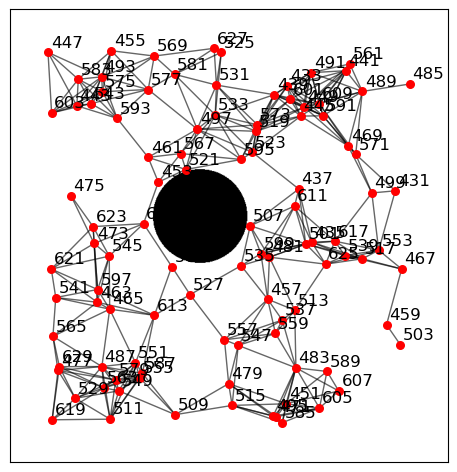

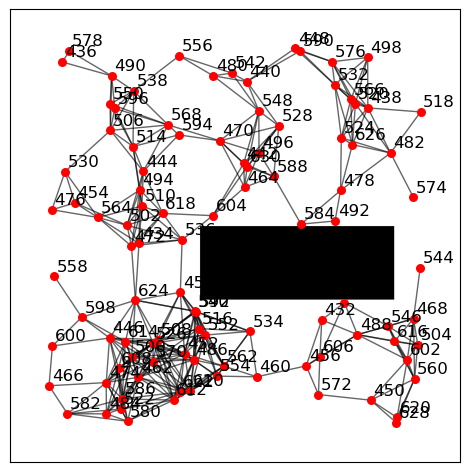

In [168]:
from pymote.environment import Environment2D
o_env = Environment2D(path='images/o_shape.png')
c_env = Environment2D(path='images/c_shape.png')
o_net = Network(environment=o_env)
c_net = Network(environment=c_env)
for _ in range(100):
    o_net.add_node()
    c_net.add_node()
o_net.show()
c_net.show()

* `Network.pos` - lokacija čvorova u okruženju

* `Network.ori` - orijentacija čvorova u okruženju

* `Network.algorithms` - torka algoritama: svi čvorovi izvršavaju iste algoritme, pa je mreža adekvatno mjesto za definiciju

In [169]:
net.algorithms

(<pymote.algorithms.broadcast.Flood at 0x1f441ed7790>,)

* `Network.channelType` - model komunikacijskog kanala

In [170]:
net.channelType

Environment2D
Node 631 is placed on position (0, 0).
Node 632 is placed on position [0, 1].
Node 633 is placed on position [0, 11].
Node 634 is placed on position [0, 21].
Node 635 is placed on position [0, 31].
Node 636 is placed on position [0, 41].
Node 637 is placed on position [0, 51].
Node 638 is placed on position [0, 61].
Node 639 is placed on position [0, 71].
Node 640 is placed on position [0, 81].
Node 641 is placed on position [0, 91].
Node 642 is placed on position [0, 101].
Node 643 is placed on position [0, 111].
Node 644 is placed on position [0, 121].
Node 645 is placed on position [0, 131].
Node 646 is placed on position [0, 141].
Node 647 is placed on position [0, 151].
Node 648 is placed on position [0, 161].
Node 649 is placed on position [0, 171].
Node 650 is placed on position [0, 181].
Node 651 is placed on position [0, 191].


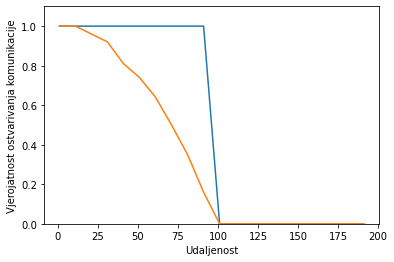

In [171]:
from pymote.channeltype import Udg, SquareDisc
from numpy import mean
import matplotlib.pyplot as plt

udg = Udg(net.environment)
scd = SquareDisc(net.environment)
udg_cr = []
scd_cr = []
distances = range(1, 201, 10)
net = Network()
node1 = net.add_node(pos=(0, 0))
for distance in distances:
    node2 = net.add_node(pos=[0, distance])
    udg_cr.append(mean(list(map(lambda x: udg.in_comm_range(net, node1, node2), range(100)))))
    scd_cr.append(mean(list(map(lambda x: scd.in_comm_range(net, node1, node2), range(100)))))
plt.ylim(0, 1.1)
plt.xlabel("Udaljenost")
plt.ylabel("Vjerojatnost ostvarivanja komunikacije")
plt.plot(distances, udg_cr)
plt.plot(distances, scd_cr)


* model komunikacije kroz `Network.outbox` i `Network.communicate()`

Mreža je središnji objekt u Pymote paketu i ona sadrži sve potrebne informacije kako bi se rekreirao eksperiment ili sačuvali podaci za kasniju analizu. Shodno tome implementirane su metode za njeno spremanje i čitanje s diska:

In [172]:
write_pickle(net, 'mreza1.tar.gz')
net_from_file = read_pickle('mreza1.tar.gz') 
net_from_file

In [173]:
# ukoliko je potrebno može se koristiti i
# %debug

### Algoritmi

Pymote podržava dva tipa algoritama raspodijeljeni i centralizirani:

* *Centralizirani* algoritmi se implementiraju kao podklase od `NetworkAlgorithm` i funkcioniraju po prinicipu izravnog upisivanja podataka u memoriju čvorova.
* *Raspodijeljeni* algoritmi se implementiraju kao podklase od `NodeAlgorithm`. Raspodijeljeni algoritmi mogu koristiti samo informacije spremljene u samoj memoriji čvora te one dobivene očitanjem osjetila koje pojeduje čvor.

### Čvorovi

Čvorovi su instance klase `Node` koja između ostalog implementira slijedeće atribute i metode:

* `memory` - `dict` u kojem čvor čuva cjelokupno znanje koje može prikupiti na dva načina:
 * očitanje osjetila - npr. polje `Neighbors` u algoritmu `Flood`
 * informacije u primljenim porukama - npr. polje `I` u algoritmu `Flood`

In [174]:
# some_node je cvor iz mreze u kojoj je izvrsen algoritam Flood
some_node.memory['Neighbors']

In [175]:
some_node.memory['I']

'Hello again'

* `status` - registar u memoriji s posebnim značenjem za raspodijeljene algoritme implementiran je kao poseban atribut

In [176]:
some_node.status

'DONE'

* `commRange` - komunikacijski domet čvora: u kombinaciji s pozicijom, okruženjem i modelom kominikacijskog kanala određuje susjede pojedinog čvora

In [177]:
some_node.commRange

100

* `outbox` i `_inbox` - liste u kojima su spremeljene poruke (instance klase `Message`) spremene za slanje odnosno primljene poruke
* `send()` - metoda za slanje poruka drugim čvorovima
* `compositeSensor` - predstavlja torku osjetila koji su instalirani na čvoru te implementira metodu `read()` koja vraća `dict` s ključevima koji odgovaraju pojedinom osjetilu, a vrijednosti su njihova trenutna očitanja

In [178]:
print(some_node.compositeSensor)
print(some_node.compositeSensor.sensors)
some_node.compositeSensor.read()

(<pymote.sensor.NeighborsSensor object at 0x000001F441AF1AF0>,)


{'Neighbors': <dict_keyiterator at 0x1f441ef7e00>}

### Osjetila

Osjetila predstavljaju sučelje čvora prema okolini. Impelentirani su kao podklase apstraktne klase `Sensor`. Implementiraju metodu `read()` koja u ovisnosti o osjetilu može svoje podatke dobiti uvidom u mrežu odnosno okruženje.

In [179]:
from pymote.sensor import TruePosSensor
new_net = Network()

node = new_net.add_node(pos=[100, 100])
node.compositeSensor = (TruePosSensor, 'DistSensor')

new_net.add_node(pos=[170, 170])
node.compositeSensor.read()

Environment2D
Node 652 is placed on position [100, 100].
Node 653 is placed on position [170, 170].


{'Dist': {<Node id=653>: 107.36606231856706}, 'TruePos': array([100, 100])}

Zgodno je primjetiti kako je prvo osjetilo pridruženo kao klasa, a drugo samo imenom klase. I jedna i druga opcija su moguće.

Pojedino osjetilo može implementirati atribut `probabilityFunction` koji mu omogućava 'zašumljivanje' dobivenih podataka kako bi očitanje bilo bliže realnom očitanju koje je u većini slučajeva podložno manjim ili većim mjernim nesigurnostima.

In [180]:
dist_sensor = node.compositeSensor.sensors[0]
dist_sensor.probabilityFunction.pf

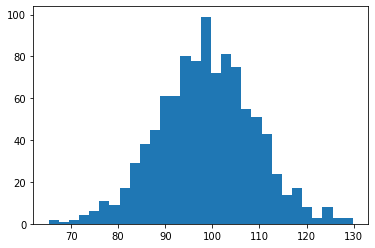

In [181]:
distances = []
for i in range(1000):
    distances.append(list(node.compositeSensor.read()['Dist'].values())[0])
h = plt.hist(distances,bins=30)

Osjetila koje određeni čvor posjeduje mogu promijeniti njegovu ulogu unutar pojeding algoritma. Primjerice kod algoritma lokalizacije čvor s `TruePos` osjetilom predstavlja sidro.

Osjetila služe i kako bi se implementirala određene pretpostavke, nazvane još i ograničenja algoritma. Primjerice, ukoliko algoritam zahtijeva za svaki čvor poznavanje svojih susjeda tada se u svakom čvoru postavlja osjetilo `NeighborsSensor` čijim očitanjem čvor u svakom trenutku može 'očitati' svoje susjede.

### Simulacija

Klasa `Simulation` se brine za izvršavanje algoritma u pripadajućoj mreži `Simulation.network`.

Između ostalog, brine se i za osvježavanje grafičkog sučelja simulatora. 

<!--- Definirana je kao dretva (*thread*) odnosno podklasa od klase `QtCore.QThread` paketa Pyside.
-->

### Postavke

Kako bi rad u interaktivnoj konzoli, grafičkom sučelji ili u automatiziranim eksperimentima bio olakšan potrebno je preddefinirati određene vrijednosti. Takve vrijednosti definiraju se u postavkama `pymote.conf.settings`.

Trenutne globalne postavke:

In [182]:
"""Default pymote settings.

Override these with settings in the module pointed-to by the 
PYMOTE_SETTINGS_MODULE environment variable or by using 
settings.configure(**settings) or settings.load('path.to.settings')

"""

import scipy.stats 
from numpy import pi

###########
# NETWORK #
###########
ENVIRONMENT = 'Environment2D'
ENVIRONMENT2D_SHAPE = (600,600)


ALGORITHMS = ()
#ALGORITHMS = ((ReadSensors,
#               {'sensorReadingsKey':'sensorReadings'}),
#              )

CHANNEL_TYPE = 'Udg'




##########
#  NODE  #
##########
SENSORS = ('NeighborsSensor', )
#SENSORS = ('AoASensor','DistSensor')
ACTUATORS = ()
COMM_RANGE = 100

AOA_PF_PARAMS = {'pf': scipy.stats.norm,
                 'scale':10*pi/180} # in radians
DIST_PF_PARAMS = {'pf': scipy.stats.norm,
                 'scale':10}


Postavke se mogu promijeniti odnosno prepisati (*override*-ati) na nekoliko načina:

* pisanjem novog modula settings.py na kojeg se referencira *environment* varijabla `PYMOTE_SETTINGS_MODULE` u npr. `paket.podpaket.settings`
* prije prvog korištenja postavki one se mogu promijeniti korištenjem `settings.configure(**settings)` ili
* korištenjem `settings.load('paket.podpaket.settings')` u bilo kojem trenutku

## GUI

Grafičko sučelje simulatora pokreće se:

1. u *standalone* verziji korištenjem instaliranog programa `pymote-simgui`
2. iz interaktivne konzole sa `%run pymote/gui/simulationgui.py`

Prednost druge metode je u tome što se paralelno sa sučeljem u konzoli može pristupiti svim objektima koristeći objekt `simgui` npr. `simgui.net` predstavlja mrežu koja je trenutno u sučelju.